In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = np.loadtxt("C17A_yaw.txt")

In [3]:
print(data)

[ 144.995  145.055  145.133 ...,   56.467   56.424   56.31 ]


In [4]:
time = np.ones_like(data)
print(time)

[ 1.  1.  1. ...,  1.  1.  1.]


In [5]:
print(np.shape(time))

(223734,)


In [6]:
time = np.ones_like(data)
k = 0
j = 1/41
while k < 223734:
    time[k] = time[k]*k*j/60/60
    w = k
    k+=1
print(w)

223733


In [7]:
print(time)

[  0.00000000e+00   6.77506775e-06   1.35501355e-05 ...,   1.51579268e+00
   1.51579946e+00   1.51580623e+00]


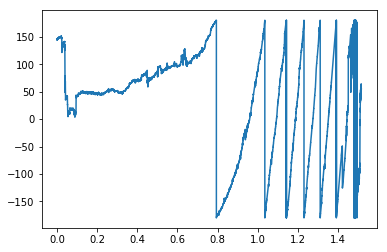

In [8]:
plt.plot(time,data)

In [9]:
i=0
n=0
wait = 0
waiting_time = 0
data_continuous = np.ones_like(data)
while n < 223734:
    if wait == 1:
        waiting_time+=1
    if waiting_time == 10000:
        wait = 0
    if data[n-1] > 0 and data[n] < 0 and wait == 0 and n != 141723:
        i+=1
        wait = 1
        waiting_time = 0
    data_continuous[n] = data[n]+i*360
    n+=1
print(data_continuous)

[  144.995   145.055   145.133 ...,  2576.467  2576.424  2576.31 ]


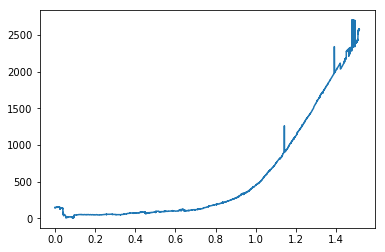

In [10]:
plt.plot(time, data_continuous)

In [11]:
print(data_continuous[141722])

360.004


In [12]:
print(data[1])

145.055


In [13]:
import scipy.optimize

In [34]:
def drift(x, a,b, c, d, e):
    return a*np.exp(d*x)+e*x**b+c

In [35]:
r = scipy.optimize.curve_fit(drift, time, data_continuous)
print(r)

(array([   0.34316674,   11.98331229,   59.90831839,    7.39312098,
       -155.79059628]), array([[  1.98178125e-06,  -5.77058640e-06,  -7.59230569e-05,
         -5.53745195e-06,   7.65456579e-05],
       [ -5.77058640e-06,   1.71233027e-05,   2.27402487e-04,
          1.59325027e-05,  -1.53567501e-04],
       [ -7.59230569e-05,   2.27402487e-04,   9.51272243e-03,
          1.95437575e-04,   1.76745672e-03],
       [ -5.53745195e-06,   1.59325027e-05,   1.95437575e-04,
          1.56677517e-05,  -2.76462848e-04],
       [  7.65456579e-05,  -1.53567501e-04,   1.76745672e-03,
         -2.76462848e-04,   2.35027879e-02]]))


In [37]:
(a,b, c, d, e) = r[0]
print(a,b,c, d, e)

0.34316674209 11.9833122906 59.9083183858 7.39312097564 -155.790596282


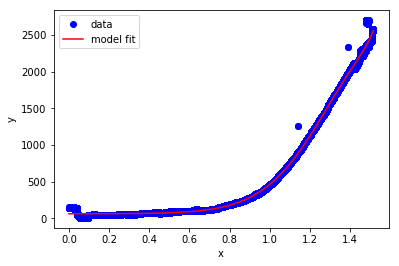

In [38]:
plt.plot(time, data_continuous, linestyle='' , marker='o', color='blue', label='data')
plt.plot(time, drift(time, a, b, c, d, e), linestyle='-', color='red' , label='model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')

In [39]:
data_no_drift = data_continuous - drift(time,a,b,c,d,e)

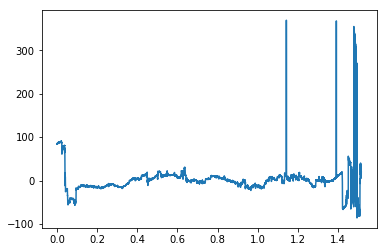

In [40]:
plt.plot(time,data_no_drift)